<a href="https://colab.research.google.com/github/lellabhaskar/DataScience/blob/main/4p_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Superstore data set
# https://community.tableau.com/docs/DOC-1236

!ls

 sample_data  'Sample - Superstore.xls'


In [2]:
import pandas as pd
df = pd.read_excel('Sample - Superstore.xls')
df.head()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [3]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

warnings.filterwarnings("ignore") # for production use 
#never use development because warnings must be consider into bug and try to fix if it is possible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Whenever you are working into TimeSeries analysis -> refer to TIMESTAMPS columns
# if you don't have timestamps but data is arranged in either time-ascending or descending order, take a reference timeline -> 1990-2000 
# TIMESTAMP should work like an INDEX and not input dataset 


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
# Based on above data, we need to analysis for TimeSeries

In [6]:
len(df)

9994

In [ ]:
# TimeSeries Analysis are two types -> Univariate and multivariate 


In [ ]:
# Univariate
# One Feature is going to fluctuate w.r.t. TIME 

In [7]:
df.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [ ]:
# Based on above data, trying to findout all important Categorical data

In [8]:
df.Country.value_counts() # this is not import of categoritcal data because all values belongs to only one Country

United States    9994
Name: Country, dtype: int64

In [9]:
  df.City.value_counts() # this is also not categorical data due to Too many values for city and here anlaysis possible only some cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Holyoke            1
Vacaville          1
Portage            1
Santa Maria        1
Norfolk            1
Name: City, Length: 531, dtype: int64

In [10]:
colNames =df.columns
for i ,feature in enumerate(colNames):
  print(colNames[i])
  #print(df[feature].value_counts())
  print(len(df[feature].value_counts()))

Row ID
9994
Order ID
5009
Order Date
1237
Ship Date
1334
Ship Mode
4
Customer ID
793
Customer Name
793
Segment
3
Country
1
City
531
State
49
Postal Code
631
Region
4
Product ID
1862
Category
3
Sub-Category
17
Product Name
1850
Sales
6144
Quantity
14
Discount
12
Profit
7545


In [ ]:
# Based on above output ,Region and Category or Sub-Category Columns are the good Categorical Data

In [11]:
colNames = df.columns 
for i, feature in enumerate(colNames):
  print(colNames[i] + " ------------ " + str(len(df[feature].value_counts())))

Row ID ------------ 9994
Order ID ------------ 5009
Order Date ------------ 1237
Ship Date ------------ 1334
Ship Mode ------------ 4
Customer ID ------------ 793
Customer Name ------------ 793
Segment ------------ 3
Country ------------ 1
City ------------ 531
State ------------ 49
Postal Code ------------ 631
Region ------------ 4
Product ID ------------ 1862
Category ------------ 3
Sub-Category ------------ 17
Product Name ------------ 1850
Sales ------------ 6144
Quantity ------------ 14
Discount ------------ 12
Profit ------------ 7545


In [ ]:
# 1) Region 2) Category 3) Sub-Category -Comparitively weaker but still valid

In [ ]:
# i have choosen Category but any one you can choose

In [12]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
furniture_data=df.loc[df['Category']=='Furniture']
furniture_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [14]:
len(furniture_data)

2121

In [15]:
print(furniture_data['Order Date'].min())
print(furniture_data['Order Date'].min())

2014-01-06 00:00:00
2014-01-06 00:00:00


In [ ]:
# Two types of numbers -> 1. Continuous  2. Discrete 
# Continuous are numerical real values and Discrete are categorical features

In [ ]:
# what is the feature that i want to predict against time?
# y=f(x) => y is a continuous number that will change as per time

In [16]:
# if i was a Logistics planner or Business Analyst ,i have chosen 'Ship Mode' is the categorical column
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
# Continuous Variables 

In [ ]:
 # if i was Sales Person , i am interest to choose columns are Sales Profit
 # if i was Marketing Person ,i am interest to choose column Discount rather than Sales or Profit
 

In [ ]:
# Best Continuous variables to predict against time ---->  Sales	Quantity	Discount	Profit
# Here Sales and Profit are the best for continuous variables
# not suited for Continous variables here are 	Quantity(logistic Business Analyst)  and	Discount (too many zero's)

In [ ]:
# Type of Numbers
# 1.Integers -> Complete positive ,zero and negative
# 2.Real Numbers -> All integers that are not imaginary
# 3.Imaginary Numbers --> Any number under sqrt of -1

# Rational and Irrational Numbers  -> rational numbers are calcuatable numbers and irrational are PI,22/7 etc..

# Discrete and Continuous Numbers

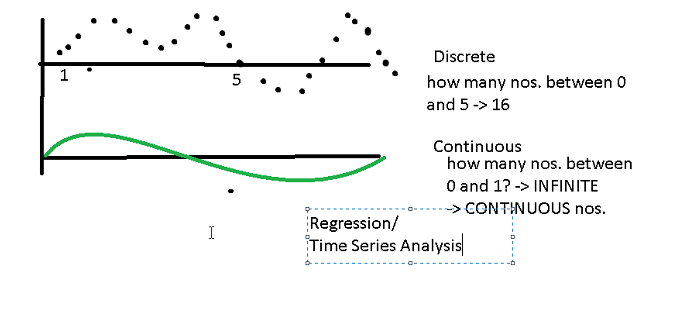

In [ ]:
# PI Chart   --> Discrete
# Histograms --> Discrete
# Line Chart --> Continuous

In [ ]:
# Demo with Sales Column

In [ ]:
# len(furniture_data)  # we have 4 years of data represented by 2121 rows of dataset
# 365 *4 --> 1460
# at least some dates have more than 1 order and maybe some dates may not orders at all.

# For TimeSeriesAnalysis ,we don't expect a GAUSSIAN distribution specially when variables are profit, loss, sales etc. 
# which either increase or decrease! they don't go bell curve

# Note: # prev cases of classification, we would have preferred uniform or gaussian or normal distribution

In [19]:
data=df.loc[df['Category']=='Furniture']

In [20]:
# ORDER BY and GROUP BY were our go to methods in SQL!
data_grouped = data.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()
data_grouped.tail()
# Above Assumptions were correct and at least some dates have more than 1 order and some dates may not orders at all 

,Order Date,Sales
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180
888,2017-12-30,323.1360


In [ ]:
# Here Predicting Day by Day will be a mistake -> real data for this granularity does not exist
# Weekly or monthly prediction 
# Temp this week will be around 22
# M-> 22, T-> 21, W->33, .... Sun-> 21 
# Between the two, the weekly prediction have lesser chances of going wrong than daily prediction
# Monthly will be better than weekly
# Quarter will be better than monthly , annual better than quarterly 

In [21]:
data_grouped.set_index('Order Date', inplace=True)
y = data_grouped['Sales'].resample('MS').mean() # Average sales of month will be a Better prediction than Total sales 
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

In [22]:
len(y) # 48 was expected for 4 years- Proper representation for all discrete timestamps

48

In [24]:
y.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [25]:
y['2014':'2015']

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
Freq: MS, Name: Sales, dtype: float64

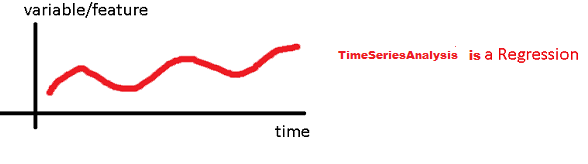

In [ ]:
# Independence Tests 
# Univariate variable for TSA -> make sure that it's an independent variable
# We preferred Sales over Profit because -> Profit was dependent on Discount and Sales 
# For BULK data -> always do an independence test 
# Profit = y = f(Sales, Discount) <- Profit was dependent 
# Sales -> y = f(order_items ) 

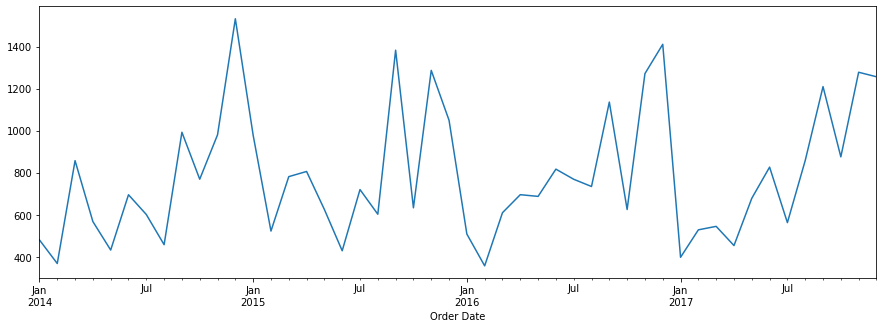

In [26]:
plt.figure()
y.plot(figsize=(15,5))
plt.show()